In [0]:
from keras.models import Sequential
from keras import layers 
from keras.layers import Embedding , Flatten
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
from keras.callbacks import TensorBoard
from datetime import time
import tensorflow as tf

In [3]:
import pandas as pd 
df=pd.read_csv('drive/My Drive/imdb_master1.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
y = df['label'].values

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


In [0]:
# tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
# getting the vocabulary of data
# sentences = tokenizer.texts_to_matrix(sentences)

max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentences,maxlen=max_review_len)

In [0]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

In [8]:
model = Sequential()
model.add(layers.Dense(300,input_dim=2470, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

W0713 19:04:01.169696 140344329934720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 19:04:01.186305 140344329934720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 19:04:01.227049 140344329934720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 19:04:01.252299 140344329934720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0713 19:04:01.401341 140344329934720 deprecation.py:323] From /usr/local/lib/python3.6

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 10s 137us/step - loss: 8.1640 - acc: 0.4930 - val_loss: 8.0171 - val_acc: 0.5026
Epoch 2/5
75000/75000 [==============================] - 10s 129us/step - loss: 8.0730 - acc: 0.4991 - val_loss: 8.0171 - val_acc: 0.5026
Epoch 3/5
75000/75000 [==============================] - 10s 128us/step - loss: 8.0730 - acc: 0.4991 - val_loss: 8.0171 - val_acc: 0.5026
Epoch 4/5
75000/75000 [==============================] - 10s 128us/step - loss: 8.0730 - acc: 0.4991 - val_loss: 8.0171 - val_acc: 0.5026
Epoch 5/5
75000/75000 [==============================] - 10s 129us/step - loss: 8.0730 - acc: 0.4991 - val_loss: 8.0171 - val_acc: 0.5026


In [95]:
[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

25000/25000 [==============================] - 2s 83us/step
Evaluation result on Test Data : Loss = 8.019219701538086, accuracy = 0.50244


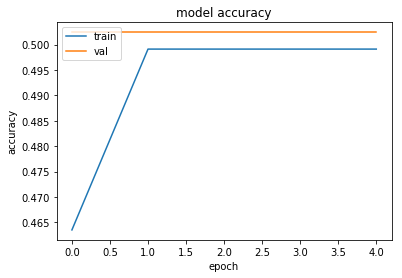

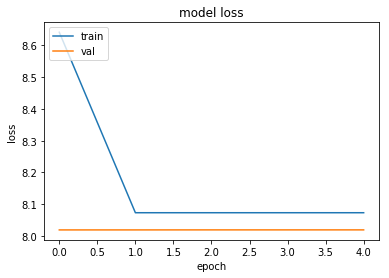

In [96]:
# Accuracy plot for train and validation datasets
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show() 

# Loss plot for train and validation datasets
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [18]:
import pandas as pd 
df=pd.read_csv('drive/My Drive/imdb_master1.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
y = df['label'].values
# tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
# getting the vocabulary of data
# sentences = tokenizer.texts_to_matrix(sentences)

max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentences,maxlen=max_review_len)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


In [19]:
# Number of features
# print(input_dim)
model = Sequential()
model.add(Embedding(output_dim =300,input_dim=2047, input_length=max_review_len))
model.add(Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=2, verbose=True, validation_data=(X_test,y_test), batch_size=256)

[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Train on 15423 samples, validate on 5141 samples
Epoch 1/2
15423/15423 [==============================] - 404s 26ms/step - loss: 9.5853 - acc: 0.3958 - val_loss: 9.8320 - val_acc: 0.3900
Epoch 2/2
5141/5141 [==============================] - 34s 7ms/step
Evaluation result on Test Data : Loss = 9.832006843097941, accuracy = 0.3900019451758435


In [22]:
tensorboard = TensorBoard(log_dir="logs/final", histogram_freq=1, write_graph=True, write_images=False)

history = model.fit(X_train,y_train,verbose=1,validation_data=(X_test,y_test),callbacks=[tensorboard])

# history=model.fit(X_train,y_train, epochs=1, verbose=True, validation_data=(X_test,y_test), batch_size=256, callbacks=[tensorboard])

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


W0713 20:38:24.446062 140507892160384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:796: The name tf.summary.histogram is deprecated. Please use tf.compat.v1.summary.histogram instead.

W0713 20:38:24.470389 140507892160384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0713 20:38:24.473299 140507892160384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Train on 15423 samples, validate on 5141 samples
Epoch 1/1
5141/5141 [==============================] - 34s 7ms/step
Evaluation result on Test Data : Loss = 9.832006843097941, accuracy = 0.3900019451758435


NameError: ignored

In [0]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train =fetch_20newsgroups(subset='train', shuffle=True)

In [10]:
import pandas as pd 
df=pd.read_csv('drive/My Drive/imdb_master.csv',encoding='latin-1')
print(df.head())
sentences = newsgroups_train.data
y = newsgroups_train.target

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


In [0]:
# tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
# getting the vocabulary of data
# sentences = tokenizer.texts_to_matrix(sentences)

max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentences,maxlen=max_review_len)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

In [16]:
model = Sequential()
model.add(layers.Dense(300,input_dim=11821, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)
[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Train on 8485 samples, validate on 2829 samples
Epoch 1/5
8485/8485 [==============================] - 6s 731us/step - loss: 15.2600 - acc: 0.0511 - val_loss: 15.2293 - val_acc: 0.0551
Epoch 2/5
8485/8485 [==============================] - 6s 674us/step - loss: 15.2760 - acc: 0.0521 - val_loss: 15.2220 - val_acc: 0.0555
Epoch 3/5
8485/8485 [==============================] - 6s 680us/step - loss: 15.3260 - acc: 0.0486 - val_loss: 15.2953 - val_acc: 0.0505
Epoch 4/5
8485/8485 [==============================] - 6s 667us/step - loss: 15.2649 - acc: 0.0524 - val_loss: 15.2450 - val_acc: 0.0537
Epoch 5/5
2829/2829 [==============================] - 1s 296us/step
Evaluation result on Test Data : Loss = 15.189413433405315, accuracy = 0.0576175326970661
